In [1]:
!pip install plotly
!pip install lightgbm
!pip install -U scikit-learn scipy matplotlib
!{sys.executable} -m pip install xgboost
!pip install optuna
!pip install numpy
!pip install sklearn
!pip install -U statsmodels

#import necessary packages

import sys 
import optuna
import plotly 


import numpy as np 
import pandas as pd 
import xgboost as xgb 
import seaborn as sns  
import plotly.express as px 
import matplotlib.pyplot as plt 
from xgboost import XGBClassifier


from pathlib import Path 
from pyspark.sql import SparkSession
from pyspark.sql import functions as func 
from pyspark.sql.types import IntegerType, DoubleType, StringType, FloatType
from pyspark.ml.classification import DecisionTreeClassifier 
from pyspark.ml.feature import StringIndexer, VectorAssembler 
from xgboost import XGBClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split ,KFold,StratifiedKFold 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.metrics import classification_report ,confusion_matrix,ConfusionMatrixDisplay 
from sklearn.metrics import roc_curve, auc ,roc_auc_score #There are several limitations when using this method with binaries, multiclass, and multi - label categorization.
from sklearn.cluster import KMeans # K-means++ uses sampling to choose the initial cluster centroids based on an actual probability density function of the contribution of each point to the total inertia.
from numpy import nan #Not a number is referred to as NaN. It is employed to symbolise undefined values. In a dataset, it is also employed to represent any missing values.





[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 8.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 8.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
zsh:1: parse error near `-m'

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A

In [2]:
#create spark context
sqlCtx = SparkSession.builder.getOrCreate()

22/08/14 18:57:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
#Here i wanted to see general data to have an idea about data type

df = sqlCtx.read.option('header','true').csv('covid.csv', inferSchema =True)

df.show()
df.dtypes

22/08/14 18:57:53 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+-------------------+---------+----------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-----

[('Province/State', 'string'),
 ('Country/Region', 'string'),
 ('Lat', 'double'),
 ('Long', 'double'),
 ('1/22/20', 'int'),
 ('1/23/20', 'int'),
 ('1/24/20', 'int'),
 ('1/25/20', 'int'),
 ('1/26/20', 'int'),
 ('1/27/20', 'int'),
 ('1/28/20', 'int'),
 ('1/29/20', 'int'),
 ('1/30/20', 'int'),
 ('1/31/20', 'int'),
 ('2/1/20', 'int'),
 ('2/2/20', 'int'),
 ('2/3/20', 'int'),
 ('2/4/20', 'int'),
 ('2/5/20', 'int'),
 ('2/6/20', 'int'),
 ('2/7/20', 'int'),
 ('2/8/20', 'int'),
 ('2/9/20', 'int'),
 ('2/10/20', 'int'),
 ('2/11/20', 'int'),
 ('2/12/20', 'int'),
 ('2/13/20', 'int'),
 ('2/14/20', 'int'),
 ('2/15/20', 'int'),
 ('2/16/20', 'int'),
 ('2/17/20', 'int'),
 ('2/18/20', 'int'),
 ('2/19/20', 'int'),
 ('2/20/20', 'int'),
 ('2/21/20', 'int'),
 ('2/22/20', 'int'),
 ('2/23/20', 'int'),
 ('2/24/20', 'int'),
 ('2/25/20', 'int'),
 ('2/26/20', 'int'),
 ('2/27/20', 'int'),
 ('2/28/20', 'int'),
 ('2/29/20', 'int'),
 ('3/1/20', 'int'),
 ('3/2/20', 'int'),
 ('3/3/20', 'int'),
 ('3/4/20', 'int'),
 ('3/5/

In [4]:
#I also wanted to read the data as a dataframe to have better inshight
 
df = pd.read_csv("covid.csv")
df.head(20)

Province/State       Country/Region        Lat        Long  \
0                            NaN          Afghanistan  33.939110   67.709953   
1                            NaN              Albania  41.153300   20.168300   
2                            NaN              Algeria  28.033900    1.659600   
3                            NaN              Andorra  42.506300    1.521800   
4                            NaN               Angola -11.202700   17.873900   
5                            NaN           Antarctica -71.949900   23.347000   
6                            NaN  Antigua and Barbuda  17.060800  -61.796400   
7                            NaN            Argentina -38.416100  -63.616700   
8                            NaN              Armenia  40.069100   45.038200   
9   Australian Capital Territory            Australia -35.473500  149.012400   
10               New South Wales            Australia -33.868800  151.209300   
11            Northern Territory            Australia -12.463400  130.845600   
12                    Queensland            Australia -27.469800  153.025100   
13               South Australia            Australia -34.928500  138.600700   
14                      Tasmania            Australia -42.882100  147.327200   
15                      Victoria            Australia -37.813600  144.963100   
16             Western Australia            Australia -31.950500  115.860500   
17                           NaN              Austria  47.516200   14.550100   
18                           NaN           Azerbaijan  40.143100   47.576900   
19                           NaN              Bahamas  25.025885  -78.035889   

    1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/20/22  \
0         0        0        0        0        0        0  ...   184038   
1         0        0        0        0        0        0  ...   300058   
2         0        0        0        0        0        0  ...   266591   
3         0        0        0        0        0        0  ...    45061   
4         0        0        0        0        0        0  ...   102209   
5         0        0        0        0        0        0  ...       11   
6         0        0        0        0        0        0  ...     8712   
7         0        0        0        0        0        0  ...  9465827   
8         0        0        0        0        0        0  ...   424400   
9         0        0        0        0        0        0  ...   182701   
10        0        0        0        0        3        4  ...  3045062   
11        0        0        0        0        0        0  ...    87009   
12        0        0        0        0        0        0  ...  1426054   
13        0        0        0        0        0        0  ...   672144   
14        0        0        0        0        0        0  ...   219909   
15        0        0        0        0        1        1  ...  2314561   
16        0        0        0        0        0        0  ...  1019698   
17        0        0        0        0        0        0  ...  4675532   
18        0        0        0        0        0        0  ...   795190   
19        0        0        0        0        0        0  ...    36502   

    7/21/22  7/22/22  7/23/22  7/24/22  7/25/22  7/26/22  7/27/22  7/28/22  \
0    184224   184360   184473   184587   184819   185086   185272   185393   
1    301394   302767   303925   304890   305123   306789   308050   309278   
2    266654   266700   266772   266839   266916   267010   267096   267194   
3     45326    45326    45326    45326    45326    45326    45326    45508   
4    102209   102301   102301   102301   102301   102301   102301   102301   
5        11       11       11       11       11       11       11       11   
6      8712     8736     8736     8736     8736     8741     8741     8741   
7   9465827  9465827  9465827  9507562  9507562  9507562  9507562  9507562   
8    424400   424400   424400   424400   425365   425365   425365   425365   
9 

In [5]:
#Here i dropped the three columns from data to see only countries and cases day one day. We can also do this with
#the help of excel tool. 

dropcol = df

In [6]:
dropcol.drop(['Lat','Long', 'Province/State'], axis=1, inplace=True)
df.head()

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4         Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...  7/20/22  7/21/22  7/22/22  7/23/22  \
0        0        0        0  ...   184038   184224   184360   184473   
1        0        0        0  ...   300058   301394   302767   303925   
2        0        0        0  ...   266591   266654   266700   266772   
3        0        0        0  ...    45061    45326    45326    45326   
4        0        0        0  ...   102209   102209   102301   102301   

   7/24/22  7/25/22  7/26/22  7/27/22  7/28/22  7/29/22  
0   184587   184819   185086   185272   185393   185481  
1   304890   305123   306789   308050   309278   310362  
2   266839   266916   267010   267096   267194   267287  
3    45326    45326    45326    45326    45508    45508  
4   102301   102301   102301   102301   102301   102301  

[5 rows x 921 columns]

In [7]:
#we can have better ide about the dataset. In this case we can understand the number of columns and rows in the dataset.
#Dataset size and information about data with the ghelp of dataframe. 

print("dataset shape  : ",df.shape)
print("dataset rows   : ",df.shape[0])
print("dataset columns: ",df.shape[1])
print("dataset size   : ",df.size)
print(df.info())

dataset shape  :  (285, 921)
dataset rows   :  285
dataset columns:  921
dataset size   :  262485
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 921 entries, Country/Region to 7/29/22
dtypes: int64(920), object(1)
memory usage: 2.0+ MB
None


In [8]:
#here i checked the missing values and wanted to see total of missing values.

print(df.isnull().sum())
print()
print("Missing values = ",df.isnull().sum().sum())

Country/Region    0
1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
                 ..
7/25/22           0
7/26/22           0
7/27/22           0
7/28/22           0
7/29/22           0
Length: 921, dtype: int64

Missing values =  0


In [9]:
#i wanted to count the data to be able to identify top 3 countries. It was hard to tell which countries are top 3.

dataFrame = dropcol.sum(axis = 1)
print("\nCounting rows...\n",dataFrame)


Counting rows...
 0       84865058
1      111634002
2      122363749
3       14083963
4       36844833
         ...    
280    256019328
281        95157
282      5217606
283    121169302
284     82611504
Length: 285, dtype: int64


/var/folders/tw/q4k_f4j57sjd5zhvkg0n_d0w0000gn/T/ipykernel_84738/3570652103.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataFrame = dropcol.sum(axis = 1)


In [10]:

df.values.tolist()

[['Afghanistan',
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  8,
  8,
  8,
  8,
  11,
  11,
  11,
  14,
  20,
  25,
  26,
  26,
  26,
  24,
  24,
  34,
  40,
  42,
  74,
  80,
  91,
  106,
  114,
  114,
  166,
  192,
  235,
  269,
  270,
  299,
  337,
  367,
  423,
  444,
  521,
  521,
  555,
  607,
  665,
  770,
  794,
  845,
  908,
  933,
  996,
  1026,
  1092,
  1176,
  1226,
  1330,
  1463,
  1531,
  1703,
  1827,
  1827,
  2171,
  2469,
  2469,
  2469,
  2469,
  3224,
  3392,
  3563,
  3563,
  4402,
  4664,
  4967,
  4967,
  5339,
  6053,
  6402,
  6635,
  7072,
  7655,
  8145,
  8676,
  9216,
  9952,
  10668,
  11180,
  11917,
  12465,
  13102,
  13745,
  14529,
  15180,
  15836,
  16578,
  17353,
  17977,
  19055,
  19637,
  20428,
  21003,
  21308,
  22228,
  22976,
  23632,
  24188,
  24852,
  2561

In [11]:
# i also wanted to see how many total case around the world so far. 
my_list = dataFrame
print ("The sum of my_list is", sum(my_list))

The sum of my_list is 174715295828


# I organised the data in excel

### Dataset organized in the excel tool. According to total case numbers, top 3 country was Brazil, India and US. 
###

In [12]:
df = pd.read_csv("top3.csv")
df.head()

Weeks  Brazil  India  US
0      1       0      0   5
1      2       0      3  11
2      3       0      3  13
3      4       0      3  14
4      5       0      3  16

In [13]:
df.var()

Weeks     1.463000e+03
Brazil    1.225054e+14
India     2.779346e+14
US        8.765264e+14
dtype: float64

In [14]:
df.var(axis=1)

0      5.666667e+00
1      2.333333e+01
2      3.225000e+01
3      3.691667e+01
4      4.866667e+01
           ...     
127    1.324837e+15
128    1.350706e+15
129    1.376809e+15
130    1.404083e+15
131    1.421867e+15
Length: 132, dtype: float64

# CREATING LINEER REGRATION MODEL

In [15]:
!pip install seaborn # Visualizing library

import pandas as pd
# pandas is a software library written for the Python programming language for data manipulation and analysis.
# In this code we use it to show scatter plots. 
import seaborn as sb 
from matplotlib import pyplot as plt # We use matplotlib for create axe and figures to plot data
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import DoubleType
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col # For use the column name of the dataframe in pyspark
from pyspark.sql import SparkSession


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [16]:
top3 = sqlCtx.read.option('header','true').csv('top3.csv', inferSchema=True)
top3.show()
print(top3.dtypes)

+-----+------+------+-------+
|Weeks|Brazil| India|     US|
+-----+------+------+-------+
|    1|     0|     0|      5|
|    2|     0|     3|     11|
|    3|     0|     3|     13|
|    4|     0|     3|     14|
|    5|     0|     3|     16|
|    6|     2|     5|     74|
|    7|    31|    56|    782|
|    8|   321|   142|   6512|
|    9|  2247|   536|  56714|
|   10|  5717|  1397| 192079|
|   11| 14034|  5311| 410834|
|   12| 25262| 11487| 622493|
|   13| 43079| 20080| 820045|
|   14| 73235| 31324|1019964|
|   15|115455| 49400|1209729|
|   16|178214| 74292|1374792|
|   17|271885|106475|1531138|
|   18|395167|150793|1681130|
|   19|562963|207191|1826171|
|   20|743917|276146|1975017|
+-----+------+------+-------+
only showing top 20 rows

[('Weeks', 'int'), ('Brazil', 'int'), ('India', 'int'), ('US', 'int')]


In [17]:
top3 = sqlCtx.read.option('header','true').options(delimiter=",").csv('top3.csv')
top3.show()
print(top3.dtypes)

for _ in top3.columns:
    top3 = top3.withColumn(_,col(_).cast(DoubleType()))
print(top3.dtypes)

+-----+------+------+-------+
|Weeks|Brazil| India|     US|
+-----+------+------+-------+
|    1|     0|     0|      5|
|    2|     0|     3|     11|
|    3|     0|     3|     13|
|    4|     0|     3|     14|
|    5|     0|     3|     16|
|    6|     2|     5|     74|
|    7|    31|    56|    782|
|    8|   321|   142|   6512|
|    9|  2247|   536|  56714|
|   10|  5717|  1397| 192079|
|   11| 14034|  5311| 410834|
|   12| 25262| 11487| 622493|
|   13| 43079| 20080| 820045|
|   14| 73235| 31324|1019964|
|   15|115455| 49400|1209729|
|   16|178214| 74292|1374792|
|   17|271885|106475|1531138|
|   18|395167|150793|1681130|
|   19|562963|207191|1826171|
|   20|743917|276146|1975017|
+-----+------+------+-------+
only showing top 20 rows

[('Weeks', 'string'), ('Brazil', 'string'), ('India', 'string'), ('US', 'string')]
[('Weeks', 'double'), ('Brazil', 'double'), ('India', 'double'), ('US', 'double')]


<AxesSubplot:>

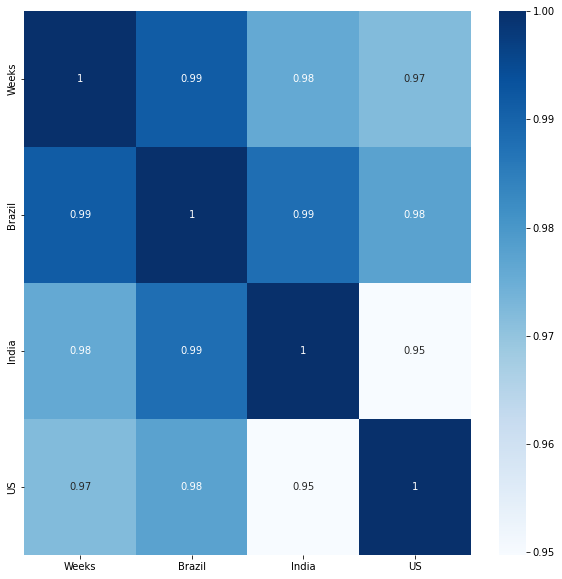

In [18]:
top3_pandas_dataframe = top3.toPandas()

fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(top3_pandas_dataframe.corr(), cmap="Blues", annot=True, ax=ax)

# LINEAR REGRSESSION

In [19]:
import numpy as np
>>> from sklearn.linear_model import LinearRegression

In [20]:
df.head() 


Weeks  Brazil  India  US
0      1       0      0   5
1      2       0      3  11
2      3       0      3  13
3      4       0      3  14
4      5       0      3  16

In [21]:
df.shape

(132, 4)

In [22]:
df = pd.read_csv('top3.csv')
df_1 = df.transpose()
print(df_1)

        0    1    2    3    4    5    6     7      8       9    ...       122  \
Weeks     1    2    3    4    5    6    7     8      9      10  ...       123   
Brazil    0    0    0    0    0    2   31   321   2247    5717  ...  31019038   
India     0    3    3    3    3    5   56   142    536    1397  ...  43160832   
US        5   11   13   14   16   74  782  6512  56714  192079  ...  84303519   

             123       124       125       126       127       128       129  \
Weeks        124       125       126       127       128       129       130   
Brazil  31266163  31541479  31818827  32206954  32610514  33004555  33397814   
India   43190282  43245517  43331645  43433345  43547809  43669850  43801678   
US      85102136  85847789  86544420  87319151  88081441  88966106  89847910   

             130       131  
Weeks        131       132  
Brazil  33659879  33790698  
India   43938764  44000138  
US      90733680  91300271  

[4 rows x 132 columns]


In [23]:
df = pd.read_csv('top3.csv')

In [24]:
df.head(20)

Weeks  Brazil   India       US
0       1       0       0        5
1       2       0       3       11
2       3       0       3       13
3       4       0       3       14
4       5       0       3       16
5       6       2       5       74
6       7      31      56      782
7       8     321     142     6512
8       9    2247     536    56714
9      10    5717    1397   192079
10     11   14034    5311   410834
11     12   25262   11487   622493
12     13   43079   20080   820045
13     14   73235   31324  1019964
14     15  115455   49400  1209729
15     16  178214   74292  1374792
16     17  271885  106475  1531138
17     18  395167  150793  1681130
18     19  562963  207191  1826171
19     20  743917  276146  1975017

In [25]:
df.shape

(132, 4)

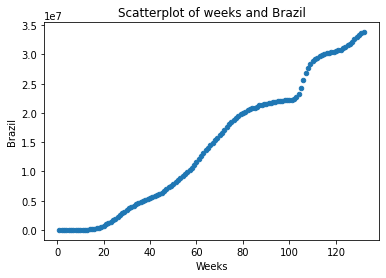

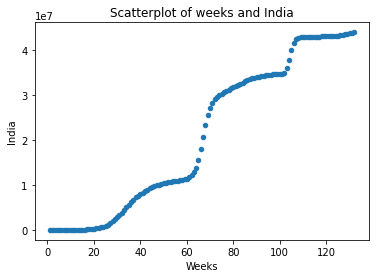

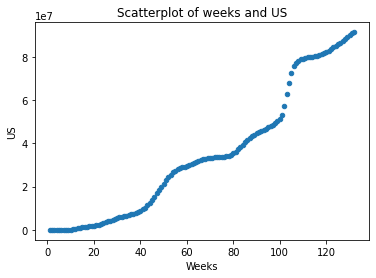

In [26]:
df.plot.scatter(x='Weeks', y='Brazil', title='Scatterplot of weeks and Brazil');
df.plot.scatter(x='Weeks', y='India', title='Scatterplot of weeks and India');
df.plot.scatter(x='Weeks', y='US', title='Scatterplot of weeks and US');

In [27]:
import seaborn as sns
%matplotlib inline

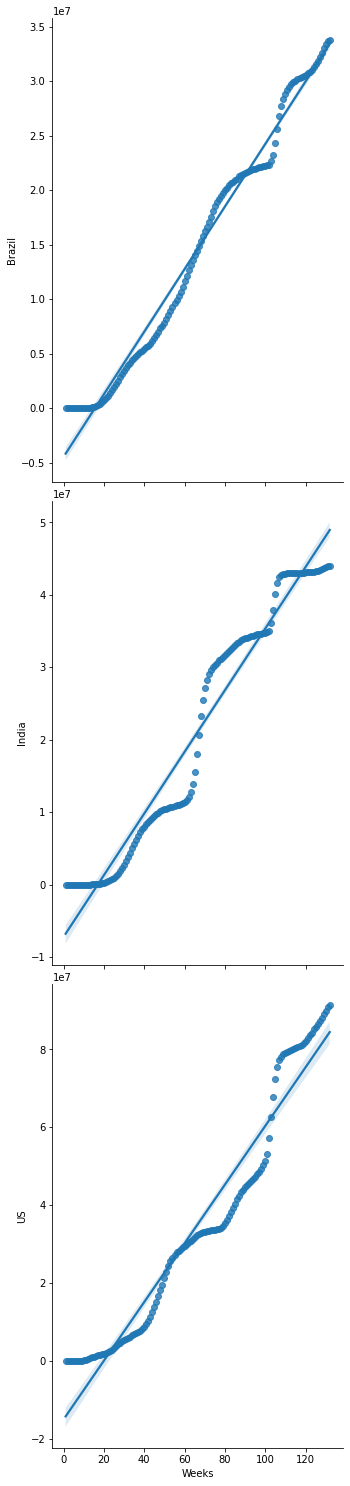

In [28]:


sns.pairplot(df, y_vars=['Brazil', 'India', 'US'], x_vars= 'Weeks', height=7, aspect = 0.7, kind='reg')                  

In [29]:
print(df.corr())

           Weeks    Brazil     India        US
Weeks   1.000000  0.991435  0.976005  0.971993
Brazil  0.991435  1.000000  0.987924  0.977563
India   0.976005  0.987924  1.000000  0.949737
US      0.971993  0.977563  0.949737  1.000000


In [30]:
print(df.describe())

            Weeks        Brazil         India            US
count  132.000000  1.320000e+02  1.320000e+02  1.320000e+02
mean    66.500000  1.461572e+07  2.109489e+07  3.514242e+07
std     38.249183  1.106821e+07  1.667137e+07  2.960619e+07
min      1.000000  0.000000e+00  0.000000e+00  5.000000e+00
25%     33.750000  4.333313e+06  4.857801e+06  6.547343e+06
50%     66.500000  1.466421e+07  1.933105e+07  3.244896e+07
75%     99.250000  2.220646e+07  3.472259e+07  5.053775e+07
max    132.000000  3.379070e+07  4.400014e+07  9.130027e+07


# Brazil variance score 

In [31]:
#User:AmiyaRanjanRout
#08 Oct, 2021
#Title:Calculate the average, variance and standard deviation in Python using NumPy
#Link:https://www.geeksforgeeks.org/calculate-the-average-variance-and-standard-deviation-in-python-using-numpy/


#defining y

feature_BRAZIL_cols = ['Brazil']
y = df[feature_BRAZIL_cols]
y = df[['Brazil']]
y

Brazil
0           0
1           0
2           0
3           0
4           0
..        ...
127  32610514
128  33004555
129  33397814
130  33659879
131  33790698

[132 rows x 1 columns]

In [32]:
#Defining X

X = df['Weeks']
X

0        1
1        2
2        3
3        4
4        5
      ... 
127    128
128    129
129    130
130    131
131    132
Name: Weeks, Length: 132, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

#training and testing X,y 

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(99, 1)
(99,)
(33, 1)
(33,)


In [34]:
from sklearn.linear_model import LinearRegression

#linear regression
#fittig
linreg = LinearRegression()
linreg.fit(y_train, X_train)

LinearRegression()

Coefficients:  [3.46720909e-06]
Variance score: 0.980267362747466


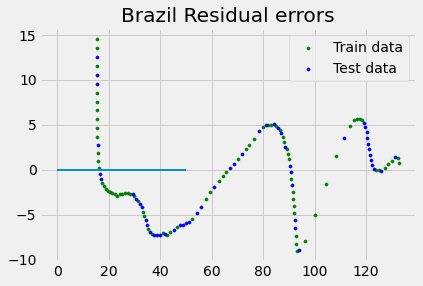

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
  
# creating training and test sets from X and Y

from sklearn.model_selection import train_test_split
y_train, y_test, X_train, X_test = train_test_split(y, X, test_size=0.4,
                                                    random_state=1)
  
# here i created a linear regression object
reg = linear_model.LinearRegression()
  
# utilising the training sets, train the model
reg.fit(y_train, X_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(y_test, X_test)))
  
# plot for residual error
  
# here i setted the plot style
plt.style.use('fivethirtyeight')
  
# plotting the residual errors in the training and test data
plt.scatter(reg.predict(y_train), reg.predict(y_train) - X_train,
            color = "green", s = 10, label = 'Train data')
  
plt.scatter(reg.predict(y_test), reg.predict(y_test) - X_test,
            color = "blue", s = 10, label = 'Test data')
  
# plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
# plotting legend
plt.legend(loc = 'upper right')
  
# for the plot title
plt.title("Brazil Residual errors")
  
# showing the plot
plt.show()

# India variance score

In [36]:
feature_INDIA_cols = ['India']
I = df[feature_INDIA_cols]
I = df[['India']]
I

India
0           0
1           3
2           3
3           3
4           3
..        ...
127  43547809
128  43669850
129  43801678
130  43938764
131  44000138

[132 rows x 1 columns]

In [37]:
X = df['Weeks']
X

0        1
1        2
2        3
3        4
4        5
      ... 
127    128
128    129
129    130
130    131
131    132
Name: Weeks, Length: 132, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, I_train, I_test = train_test_split(X,I,random_state=1)

print(I_train.shape)
print(X_train.shape)
print(I_test.shape)
print(X_test.shape)

(99, 1)
(99,)
(33, 1)
(33,)


In [39]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(I_train, X_train)

LinearRegression()

Coefficients:  [2.24813686e-06]
Variance score: 0.947855835900343


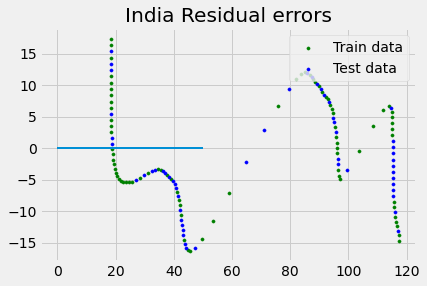

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics


from sklearn.model_selection import train_test_split
I_train, I_test, X_train, X_test = train_test_split(I, X, test_size=0.4,
                                                    random_state=1)
  
reg = linear_model.LinearRegression()
  
reg.fit(I_train, X_train)
  
print('Coefficients: ', reg.coef_)
  
print('Variance score: {}'.format(reg.score(I_test, X_test)))
  
# plot for residual error
  
plt.style.use('fivethirtyeight')
  
plt.scatter(reg.predict(I_train), reg.predict(I_train) - X_train,
            color = "green", s = 10, label = 'Train data')
  
plt.scatter(reg.predict(I_test), reg.predict(I_test) - X_test,
            color = "blue", s = 10, label = 'Test data')
  
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
plt.legend(loc = 'upper right')
  
plt.title("India Residual errors")
  
plt.show()

# US variance score

In [41]:
feature_US_cols = ['US']
U = df[feature_US_cols]
U = df[['US']]
X = df['Weeks']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, U_train, U_test = train_test_split(X,U,random_state=1)

print(U_train.shape)
print(X_train.shape)
print(U_test.shape)
print(X_test.shape)

(99, 1)
(99,)
(33, 1)
(33,)


In [43]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(U_train, X_train)

LinearRegression()

Coefficients:  [1.27918763e-06]
Variance score: 0.9434838241430802


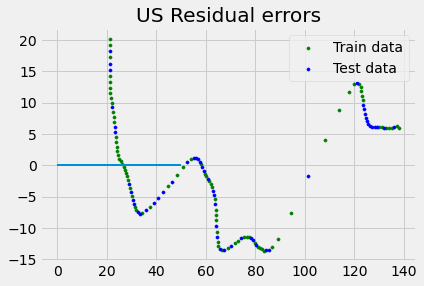

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
  

from sklearn.model_selection import train_test_split
U_train, U_test, X_train, X_test = train_test_split(U, X, test_size=0.4,
                                                    random_state=1)
  
reg = linear_model.LinearRegression()
  
reg.fit(U_train, X_train)
  
print('Coefficients: ', reg.coef_)
  
print('Variance score: {}'.format(reg.score(U_test, X_test)))
    
plt.style.use('fivethirtyeight')
  
plt.scatter(reg.predict(U_train), reg.predict(U_train) - X_train,
            color = "green", s = 10, label = 'Train data')
  
plt.scatter(reg.predict(U_test), reg.predict(U_test) - X_test,
            color = "blue", s = 10, label = 'Test data')
  
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
plt.legend(loc = 'upper right')
  
plt.title("US Residual errors")
  
plt.show()

# Variance Scores

#### US: 0.9434838241430802
#### Brazil: 0.980267362747466
#### India: 0.947855835900343

###### Brazil has the highest variance. Brazil and its linear regression model will be selected for further steps.

# b) Clustering

In [45]:
#link: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
#Title: The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need
#publish date: August 19, 2019
#Author: Pulkit Sharma

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv('top3.csv')
data.head()

Weeks  Brazil  India  US
0      1       0      0   5
1      2       0      3  11
2      3       0      3  13
3      4       0      3  14
4      5       0      3  16

In [47]:
dropdata = data

dropdata.drop('US',axis=1,inplace=True)
dropdata.drop('India',axis=1,inplace=True)
data.head()

Weeks  Brazil
0      1       0
1      2       0
2      3       0
3      4       0
4      5       0

## Inertia (Elbow Method)

In [48]:
#K-Means++ Elbow Method

In [49]:
!pip install sklearn

# importing necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [50]:
#reading data
data=pd.read_csv("top3.csv")
data.head()

Weeks  Brazil  India  US
0      1       0      0   5
1      2       0      3  11
2      3       0      3  13
3      4       0      3  14
4      5       0      3  16

In [51]:
#dropping data 
dropdata = data

dropdata.drop('US',axis=1,inplace=True)
dropdata.drop('India',axis=1,inplace=True)
data.head()

Weeks  Brazil
0      1       0
1      2       0
2      3       0
3      4       0
4      5       0

In [52]:
#pullling out statistics of the new dataset.
data.describe()

Weeks        Brazil
count  132.000000  1.320000e+02
mean    66.500000  1.461572e+07
std     38.249183  1.106821e+07
min      1.000000  0.000000e+00
25%     33.750000  4.333313e+06
50%     66.500000  1.466421e+07
75%     99.250000  2.220646e+07
max    132.000000  3.379070e+07

In [53]:
#This magnitude discrepancy might be problematic as K-Means is a distance-based method.
#thats why i brought all the variables to same magnitue by standardizing.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# to be able to see statistics of scaled data
pd.DataFrame(data_scaled).describe()

0             1
count  1.320000e+02  1.320000e+02
mean   2.018587e-17 -6.728624e-18
std    1.003810e+00  1.003810e+00
min   -1.718979e+00 -1.325544e+00
25%   -8.594893e-01 -9.325425e-01
50%    0.000000e+00  4.397084e-03
75%    8.594893e-01  6.884265e-01
max    1.718979e+00  1.739036e+00

In [54]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [55]:
# here we are seeing inertia on the fitted data
kmeans.inertia_

29.142790384629965

Text(0, 0.5, 'Inertia')

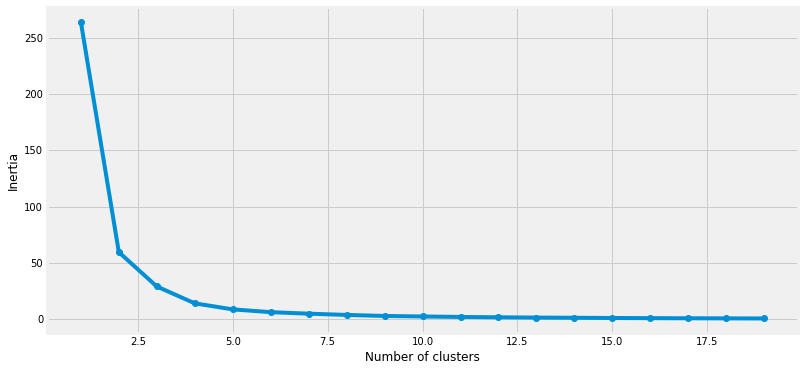

In [56]:
#fitting multiple k-means algorithms and storing the values in an empty list
#i took the range 20 for this analyse.

SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

#converting the results into a dataframe and plotting them
#in that case we can define the cluster number.
#According to the graph, the cluster number is 4.

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [57]:
#according to the elbow method I defined the numebr of cluster as 4.
model = KMeans(n_clusters=4)

#Here, I scalled the data to normalize it. This step is significant for good results.

model = model.fit(scale(data))


print(model.labels_)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


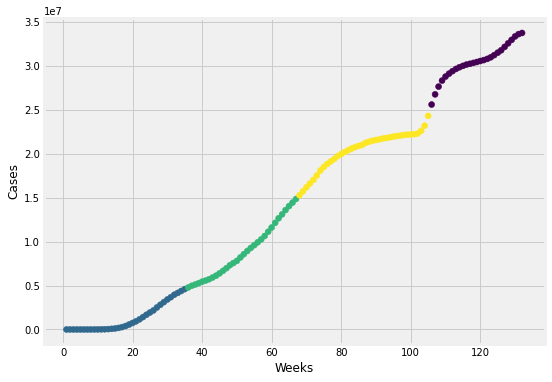

In [58]:
X = dropdata[["Weeks","Brazil"]]
#Visualising the data points here.
plt.figure(figsize=(8, 6))
plt.scatter(X["Weeks"],X["Brazil"],c = model.labels_.astype(np.int64))
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

In [59]:
#I choose 4 due to the elbow model. 
#here i alsa would like to know how many items fit in a cluster.

kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    38
1    36
3    31
2    27
Name: cluster, dtype: int64

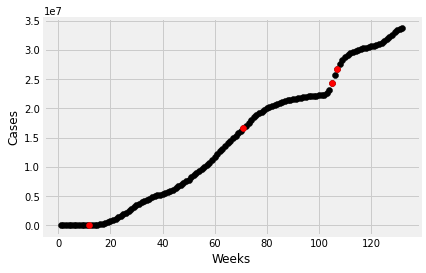

In [60]:
#here i selected the number of cluster.
#and selected random centroids for each cluster.
K=4

# Select random observation as centroids
#everytime I run this programme i could get different centroits. 
Centroids = (X.sample(n=K))
plt.scatter(X["Weeks"],X["Brazil"],c= 'black')
plt.scatter(Centroids["Weeks"],Centroids["Brazil"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

In [61]:
#implementing some conditions for algorithm.
#first i assigned all the points to the closest cluster centroids.
#after that recomputed centroids of newly formed clusters.
#and repeted for those steps.
#values might come different eveytime. 
#When the centroids do not change after two iterations, I halt the training. 
#The difference between the centroids from the previous iteration and the current iteration is 
#what I use to calculate the diff, which we previously defined as 1.

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Weeks"]-row_d["Weeks"])**2
            d2=(row_c["Brazil"]-row_d["Brazil"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Brazil","Weeks"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Brazil'] - Centroids['Brazil']).sum() + (Centroids_new['Weeks'] - Centroids['Weeks']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Brazil","Weeks"]]

-1629489.397846465
-1287704.198949508
-642704.5943009928
-639245.6192640695
-289452.2816976416
-285185.8767345054
-344098.9159811996
-278735.44009662
0.0


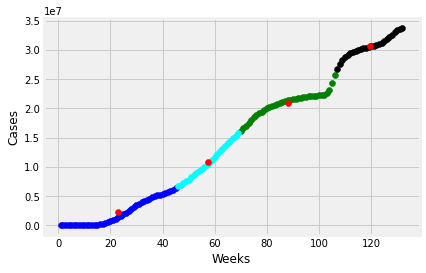

In [62]:
#i also wanted to see the clasters with Centroids. 

color=['blue','green','cyan','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Weeks"],data["Brazil"],c=color[k])
plt.scatter(Centroids["Weeks"],Centroids["Brazil"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

# c) Graph Analytics
### Neighbouring csv file created with excel based on my geographical knowladge. I will demonstrate the graphical view below.

In [63]:
data = pd.read_csv('Neighbouring.csv')
data.head()

Weeks  Uruguay  Argentina  Paraguay  Bolivia  Peru  Colombia  Venezuela  \
0      1        0          0         0        0     0         0          0   
1      2        0          0         0        0     0         0          0   
2      3        0          0         0        0     0         0          0   
3      4        0          0         0        0     0         0          0   
4      5        0          0         0        0     0         0          0   

   Guyana  Suriname  
0       0         0  
1       0         0  
2       0         0  
3       0         0  
4       0         0

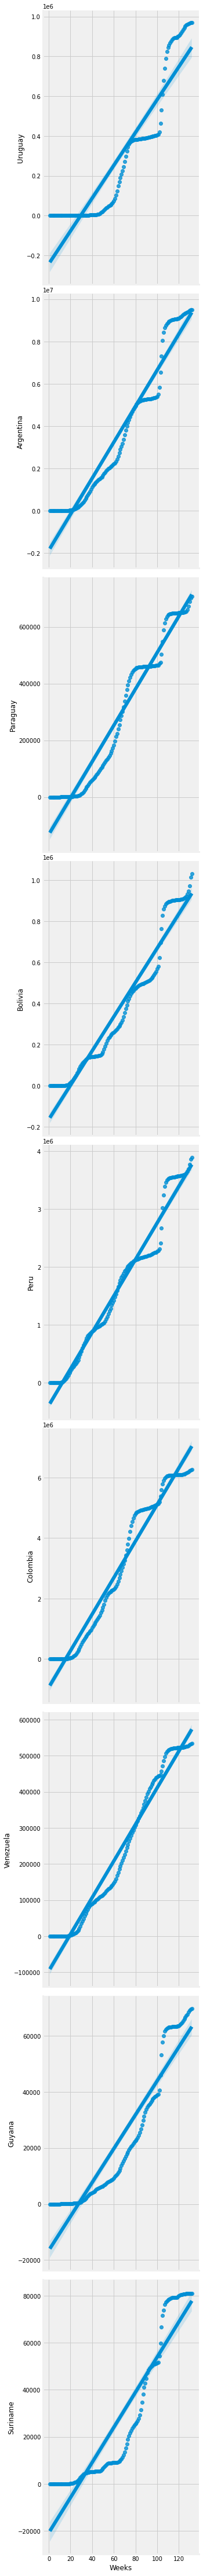

In [64]:
#linear regression of neighbour countries.

sns.pairplot(data, y_vars=['Uruguay', 'Argentina', 'Paraguay', 'Bolivia',
                           'Peru', 'Colombia','Venezuela','Guyana', 'Suriname' ], x_vars='Weeks' , 
             height=7, aspect = 0.7, kind='reg') 

# Uruguay

In [65]:
dropdata = data

dropdata.drop('Argentina',axis=1,inplace=True)
dropdata.drop('Paraguay',axis=1,inplace=True)
dropdata.drop('Bolivia',axis=1,inplace=True)
dropdata.drop('Peru',axis=1,inplace=True)
dropdata.drop('Colombia',axis=1,inplace=True)
dropdata.drop('Venezuela',axis=1,inplace=True)
dropdata.drop('Guyana',axis=1,inplace=True)
dropdata.drop('Suriname',axis=1,inplace=True)

data.head()

Weeks  Uruguay
0      1        0
1      2        0
2      3        0
3      4        0
4      5        0

In [66]:
data.describe()

Weeks        Uruguay
count  132.000000     132.000000
mean    66.500000  305880.371212
std     38.249183  341571.203910
min      1.000000       0.000000
25%     33.750000    1798.250000
50%     66.500000  198521.000000
75%     99.250000  403542.500000
max    132.000000  969803.000000

In [67]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
Uruguay_scaler = StandardScaler()
data_scaled = Uruguay_scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

0             1
count  1.320000e+02  1.320000e+02
mean   2.018587e-17  9.083643e-17
std    1.003810e+00  1.003810e+00
min   -1.718979e+00 -8.989213e-01
25%   -8.594893e-01 -8.936366e-01
50%    0.000000e+00 -3.155077e-01
75%    8.594893e-01  2.870095e-01
max    1.718979e+00  1.951136e+00

In [68]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=4, init='k-means++')

# fitting the k means on the scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=4)

In [69]:
kmeans.inertia_

11.9676838745809

Text(0, 0.5, 'Inertia')

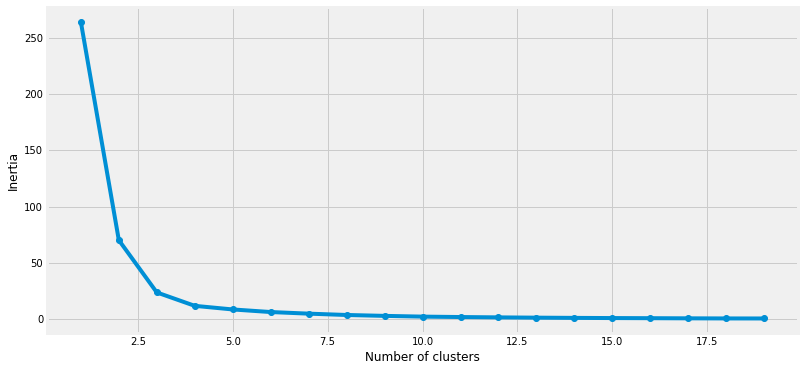

In [70]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [71]:
model = KMeans(n_clusters=4)

# Note I'm scaling the data to normalize it! Important for good results.

model = model.fit(scale(data))

# print(scale(data))
# print(data)

# We can look at the clusters each data point was assigned to
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


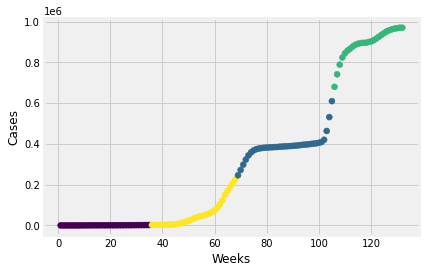

In [72]:
X = dropdata[["Weeks","Uruguay"]]
#Visualise data points
plt.scatter(X["Weeks"],X["Uruguay"],c = model.labels_.astype(np.int64))
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

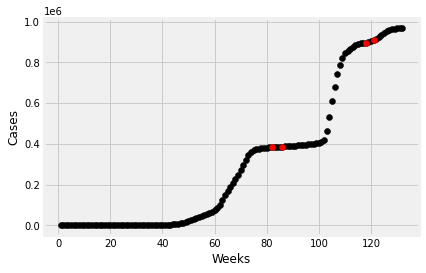

In [73]:
K=4

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Weeks"],X["Uruguay"],c= 'black')
plt.scatter(Centroids["Weeks"],Centroids["Uruguay"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

In [74]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Weeks"]-row_d["Weeks"])**2
            d2=(row_c["Uruguay"]-row_d["Uruguay"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Uruguay","Weeks"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Uruguay'] - Centroids['Uruguay']).sum() + (Centroids_new['Weeks'] - Centroids['Weeks']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Uruguay","Weeks"]]

-105163.64307612686
-43402.17147244324
-49393.85698778837
-34379.80606060603
-22572.23306982871
-27643.41086956521
0.0


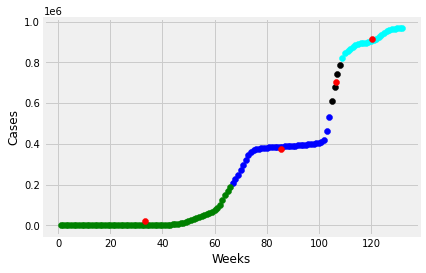

In [75]:
color=['blue','green','cyan','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Weeks"],data["Uruguay"],c=color[k])
plt.scatter(Centroids["Weeks"],Centroids["Uruguay"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

# Argentina

In [76]:
data = pd.read_csv('Neighbouring.csv')
data.head()

Weeks  Uruguay  Argentina  Paraguay  Bolivia  Peru  Colombia  Venezuela  \
0      1        0          0         0        0     0         0          0   
1      2        0          0         0        0     0         0          0   
2      3        0          0         0        0     0         0          0   
3      4        0          0         0        0     0         0          0   
4      5        0          0         0        0     0         0          0   

   Guyana  Suriname  
0       0         0  
1       0         0  
2       0         0  
3       0         0  
4       0         0

In [77]:
dropdata = data

dropdata.drop('Uruguay',axis=1,inplace=True)
dropdata.drop('Paraguay',axis=1,inplace=True)
dropdata.drop('Bolivia',axis=1,inplace=True)
dropdata.drop('Peru',axis=1,inplace=True)
dropdata.drop('Colombia',axis=1,inplace=True)
dropdata.drop('Venezuela',axis=1,inplace=True)
dropdata.drop('Guyana',axis=1,inplace=True)
dropdata.drop('Suriname',axis=1,inplace=True)

data.head()

Weeks  Argentina
0      1          0
1      2          0
2      3          0
3      4          0
4      5          0

In [78]:
data.describe()

Weeks     Argentina
count  132.000000  1.320000e+02
mean    66.500000  3.792745e+06
std     38.249183  3.356151e+06
min      1.000000  0.000000e+00
25%     33.750000  5.580120e+05
50%     66.500000  2.976294e+06
75%     99.250000  5.375986e+06
max    132.000000  9.507562e+06

In [79]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

0             1
count  1.320000e+02  1.320000e+02
mean   2.018587e-17  1.177509e-16
std    1.003810e+00  1.003810e+00
min   -1.718979e+00 -1.134393e+00
25%   -8.594893e-01 -9.674941e-01
50%    0.000000e+00 -2.441967e-01
75%    8.594893e-01  4.735403e-01
max    1.718979e+00  1.709276e+00

In [80]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=4, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=4)

In [81]:
kmeans.inertia_

11.267971281268377

Text(0, 0.5, 'Inertia')

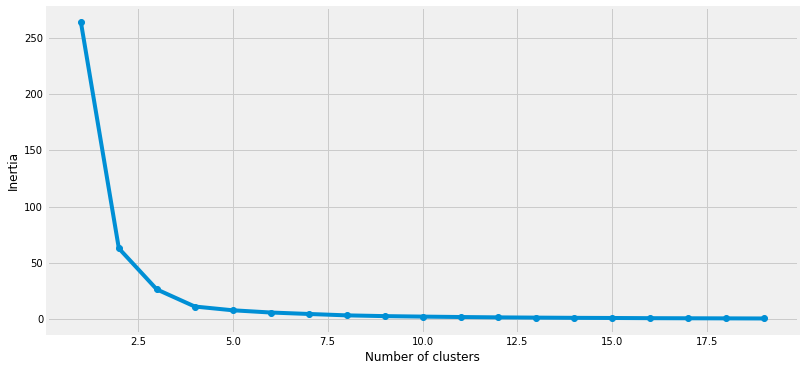

In [82]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [83]:
model = KMeans(n_clusters=4)

# Note I'm scaling the data to normalize it! Important for good results.

model = model.fit(scale(data))

# print(scale(data))
# print(data)

# We can look at the clusters each data point was assigned to
print(model.labels_)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


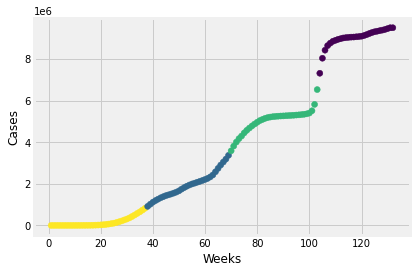

In [84]:
X = dropdata[["Weeks","Argentina"]]
#Visualise data points
plt.scatter(X["Weeks"],X["Argentina"],c = model.labels_.astype(np.int64))
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

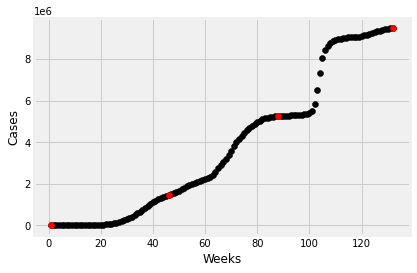

In [85]:
K=4

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Weeks"],X["Argentina"],c= 'black')
plt.scatter(Centroids["Weeks"],Centroids["Argentina"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

In [86]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Weeks"]-row_d["Weeks"])**2
            d2=(row_c["Argentina"]-row_d["Argentina"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Argentina","Weeks"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Argentina'] - Centroids['Argentina']).sum() + (Centroids_new['Weeks'] - Centroids['Weeks']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Argentina","Weeks"]]

125386.93703174155
53774.16949196809
0.0


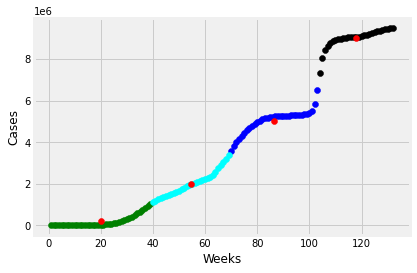

In [87]:
color=['blue','green','cyan','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Weeks"],data["Argentina"],c=color[k])
plt.scatter(Centroids["Weeks"],Centroids["Argentina"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

# Paraguay

In [88]:
data = pd.read_csv('Neighbouring.csv')
data.head()

Weeks  Uruguay  Argentina  Paraguay  Bolivia  Peru  Colombia  Venezuela  \
0      1        0          0         0        0     0         0          0   
1      2        0          0         0        0     0         0          0   
2      3        0          0         0        0     0         0          0   
3      4        0          0         0        0     0         0          0   
4      5        0          0         0        0     0         0          0   

   Guyana  Suriname  
0       0         0  
1       0         0  
2       0         0  
3       0         0  
4       0         0

In [89]:
dropdata = data

dropdata.drop('Uruguay',axis=1,inplace=True)
dropdata.drop('Argentina',axis=1,inplace=True)
dropdata.drop('Bolivia',axis=1,inplace=True)
dropdata.drop('Peru',axis=1,inplace=True)
dropdata.drop('Colombia',axis=1,inplace=True)
dropdata.drop('Venezuela',axis=1,inplace=True)
dropdata.drop('Guyana',axis=1,inplace=True)
dropdata.drop('Suriname',axis=1,inplace=True)

data.head()

Weeks  Paraguay
0      1         0
1      2         0
2      3         0
3      4         0
4      5         0

In [90]:
data.describe()

Weeks       Paraguay
count  132.000000     132.000000
mean    66.500000  294320.659091
std     38.249183  251550.005221
min      1.000000       0.000000
25%     33.750000   28027.000000
50%     66.500000  279240.500000
75%     99.250000  464142.750000
max    132.000000  707109.000000

In [91]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

0             1
count  1.320000e+02  1.320000e+02
mean   2.018587e-17 -1.917658e-16
std    1.003810e+00  1.003810e+00
min   -1.718979e+00 -1.174486e+00
25%   -8.594893e-01 -1.062644e+00
50%    0.000000e+00 -6.017733e-02
75%    8.594893e-01  6.776745e-01
max    1.718979e+00  1.647231e+00

In [92]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [93]:
kmeans.inertia_

52.40433681721029

Text(0, 0.5, 'Inertia')

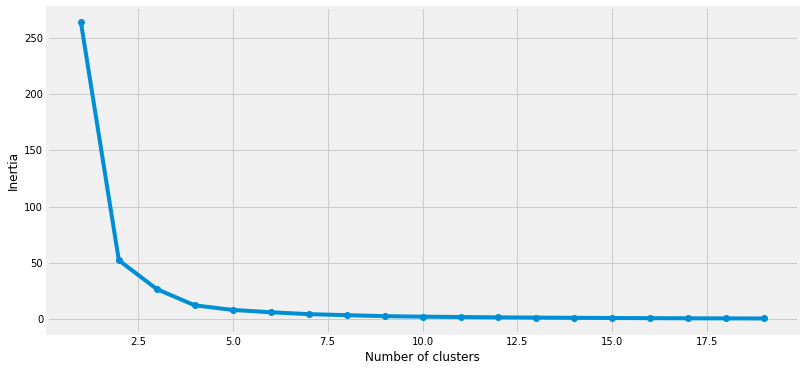

In [94]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [95]:
model = KMeans(n_clusters=4)

# Note I'm scaling the data to normalize it! Important for good results.

model = model.fit(scale(data))

# print(scale(data))
# print(data)

# We can look at the clusters each data point was assigned to
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


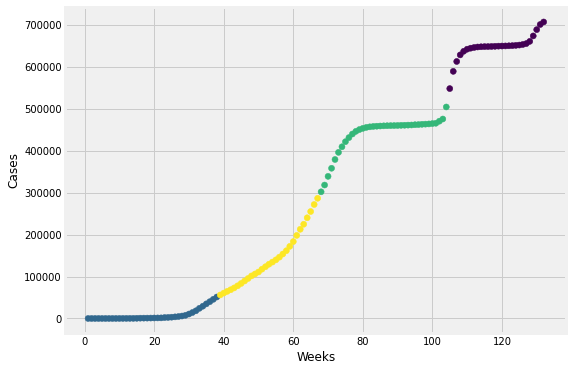

In [96]:
X = dropdata[["Weeks","Paraguay"]]
#Visualise data points
plt.figure(figsize=(8, 6))
plt.scatter(X["Weeks"],X["Paraguay"],c = model.labels_.astype(np.int64))
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

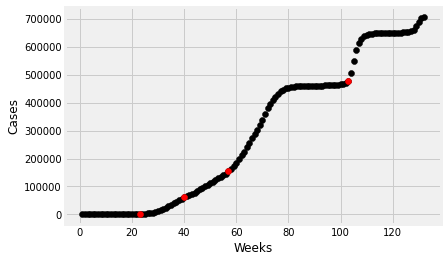

In [97]:
K=4

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Weeks"],X["Paraguay"],c= 'black')
plt.scatter(Centroids["Weeks"],Centroids["Paraguay"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

In [98]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Weeks"]-row_d["Weeks"])**2
            d2=(row_c["Paraguay"]-row_d["Paraguay"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Paraguay","Weeks"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Paraguay'] - Centroids['Paraguay']).sum() + (Centroids_new['Weeks'] - Centroids['Weeks']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Paraguay","Weeks"]]

55799.80803698308
48194.787054606146
44866.94579518437
29571.579754266193
26050.50941295545
26151.185217617312
26242.243131665033
34123.57634490714
112905.65878368977
58188.18084315068
14765.354750923201
15055.298428467944
5451.393601002761
0.0


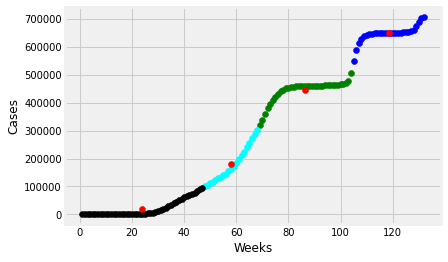

In [99]:
color=['blue','green','cyan','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Weeks"],data["Paraguay"],c=color[k])
plt.scatter(Centroids["Weeks"],Centroids["Paraguay"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

# Bolivia

In [100]:
data = pd.read_csv('Neighbouring.csv')
data.head()

Weeks  Uruguay  Argentina  Paraguay  Bolivia  Peru  Colombia  Venezuela  \
0      1        0          0         0        0     0         0          0   
1      2        0          0         0        0     0         0          0   
2      3        0          0         0        0     0         0          0   
3      4        0          0         0        0     0         0          0   
4      5        0          0         0        0     0         0          0   

   Guyana  Suriname  
0       0         0  
1       0         0  
2       0         0  
3       0         0  
4       0         0

In [101]:
dropdata = data

dropdata.drop('Uruguay',axis=1,inplace=True)
dropdata.drop('Argentina',axis=1,inplace=True)
dropdata.drop('Paraguay',axis=1,inplace=True)
dropdata.drop('Peru',axis=1,inplace=True)
dropdata.drop('Colombia',axis=1,inplace=True)
dropdata.drop('Venezuela',axis=1,inplace=True)
dropdata.drop('Guyana',axis=1,inplace=True)
dropdata.drop('Suriname',axis=1,inplace=True)

data.head()

Weeks  Bolivia
0      1        0
1      2        0
2      3        0
3      4        0
4      5        0

In [102]:
data.describe()

Weeks       Bolivia
count  132.000000  1.320000e+02
mean    66.500000  3.902100e+05
std     38.249183  3.278100e+05
min      1.000000  0.000000e+00
25%     33.750000  1.267915e+05
50%     66.500000  3.046210e+05
75%     99.250000  5.584910e+05
max    132.000000  1.032023e+06

In [103]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

0             1
count  1.320000e+02  1.320000e+02
mean   2.018587e-17 -1.968123e-16
std    1.003810e+00  1.003810e+00
min   -1.718979e+00 -1.194889e+00
25%   -8.594893e-01 -8.066319e-01
50%    0.000000e+00 -2.620879e-01
75%    8.594893e-01  5.153049e-01
max    1.718979e+00  1.965340e+00

In [104]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [105]:
kmeans.inertia_

66.37343765694679

Text(0, 0.5, 'Inertia')

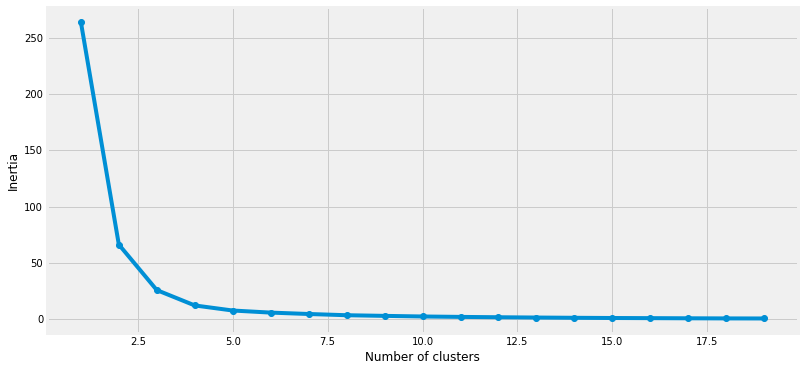

In [106]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [107]:
model = KMeans(n_clusters=4)

# Note I'm scaling the data to normalize it! Important for good results.

model = model.fit(scale(data))

# print(scale(data))
# print(data)

# We can look at the clusters each data point was assigned to
print(model.labels_)


[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


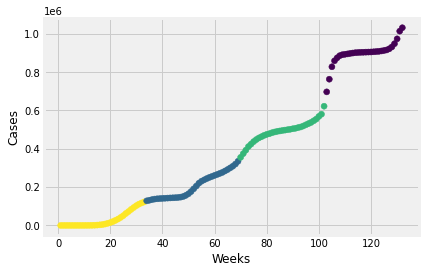

In [108]:
X = dropdata[["Weeks","Bolivia"]]
#Visualise data points
plt.scatter(X["Weeks"],X["Bolivia"],c = model.labels_.astype(np.int64))
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

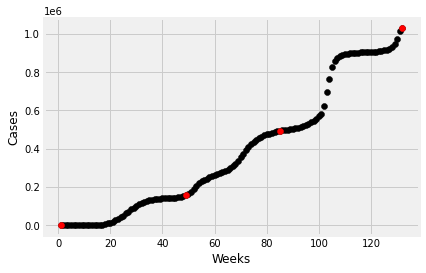

In [109]:
K=4

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Weeks"],X["Bolivia"],c= 'black')
plt.scatter(Centroids["Weeks"],Centroids["Bolivia"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

In [110]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Weeks"]-row_d["Weeks"])**2
            d2=(row_c["Bolivia"]-row_d["Bolivia"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Bolivia","Weeks"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Bolivia'] - Centroids['Bolivia']).sum() + (Centroids_new['Weeks'] - Centroids['Weeks']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Bolivia","Weeks"]]

18423.553004876398
5198.077497789578
0.0


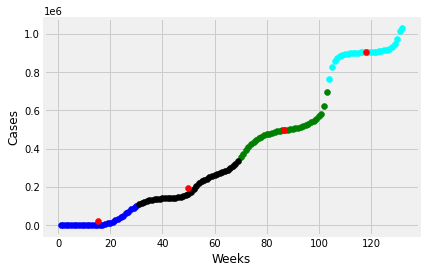

In [111]:
color=['blue','green','cyan','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Weeks"],data["Bolivia"],c=color[k])
plt.scatter(Centroids["Weeks"],Centroids["Bolivia"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

# Peru 

In [112]:
data = pd.read_csv('Neighbouring.csv')
data.head()

Weeks  Uruguay  Argentina  Paraguay  Bolivia  Peru  Colombia  Venezuela  \
0      1        0          0         0        0     0         0          0   
1      2        0          0         0        0     0         0          0   
2      3        0          0         0        0     0         0          0   
3      4        0          0         0        0     0         0          0   
4      5        0          0         0        0     0         0          0   

   Guyana  Suriname  
0       0         0  
1       0         0  
2       0         0  
3       0         0  
4       0         0

In [113]:
dropdata = data

dropdata.drop('Uruguay',axis=1,inplace=True)
dropdata.drop('Argentina',axis=1,inplace=True)
dropdata.drop('Paraguay',axis=1,inplace=True)
dropdata.drop('Bolivia',axis=1,inplace=True)
dropdata.drop('Colombia',axis=1,inplace=True)
dropdata.drop('Venezuela',axis=1,inplace=True)
dropdata.drop('Guyana',axis=1,inplace=True)
dropdata.drop('Suriname',axis=1,inplace=True)

data.head()

Weeks  Peru
0      1     0
1      2     0
2      3     0
3      4     0
4      5     0

In [114]:
data.describe()

Weeks          Peru
count  132.000000  1.320000e+02
mean    66.500000  1.703821e+06
std     38.249183  1.221813e+06
min      1.000000  0.000000e+00
25%     33.750000  7.232888e+05
50%     66.500000  1.793438e+06
75%     99.250000  2.258417e+06
max    132.000000  3.889029e+06

In [115]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

0             1
count  1.320000e+02  1.320000e+02
mean   2.018587e-17  4.676394e-16
std    1.003810e+00  1.003810e+00
min   -1.718979e+00 -1.399814e+00
25%   -8.594893e-01 -8.055794e-01
50%    0.000000e+00  7.362645e-02
75%    8.594893e-01  4.556415e-01
max    1.718979e+00  1.795309e+00

In [116]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [117]:
kmeans.inertia_

68.30785957934124

Text(0, 0.5, 'Inertia')

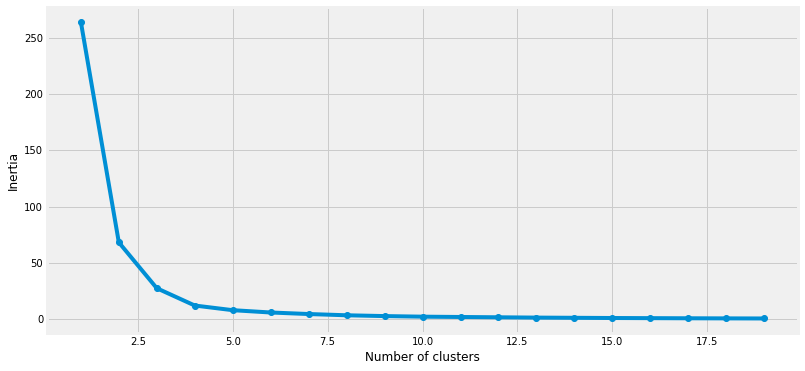

In [118]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [119]:
model = KMeans(n_clusters=4)

# Note I'm scaling the data to normalize it! Important for good results.

model = model.fit(scale(data))

# print(scale(data))
# print(data)

# We can look at the clusters each data point was assigned to
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


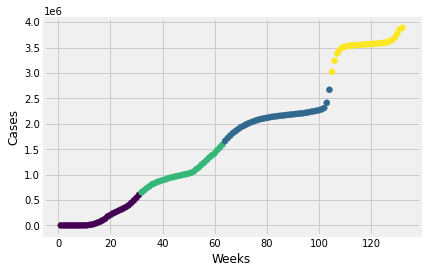

In [120]:
X = dropdata[["Weeks","Peru"]]
#Visualise data points
plt.scatter(X["Weeks"],X["Peru"],c = model.labels_.astype(np.int64))
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

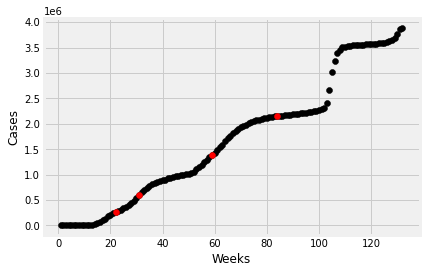

In [121]:
K=4

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Weeks"],X["Peru"],c= 'black')
plt.scatter(Centroids["Weeks"],Centroids["Peru"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

In [122]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Weeks"]-row_d["Weeks"])**2
            d2=(row_c["Peru"]-row_d["Peru"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Peru","Weeks"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Peru'] - Centroids['Peru']).sum() + (Centroids_new['Weeks'] - Centroids['Weeks']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Peru","Weeks"]]

450803.36461831804
718770.6063439552
574196.9121101738
131649.30260778905
29810.179326081416
0.0


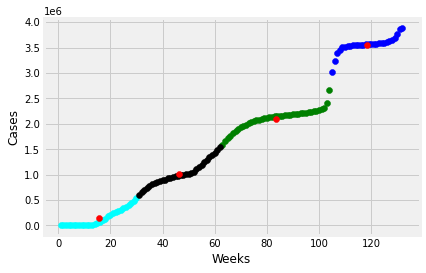

In [123]:
color=['blue','green','cyan','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Weeks"],data["Peru"],c=color[k])
plt.scatter(Centroids["Weeks"],Centroids["Peru"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

# Colombia

In [124]:
data = pd.read_csv('Neighbouring.csv')
data.head()

Weeks  Uruguay  Argentina  Paraguay  Bolivia  Peru  Colombia  Venezuela  \
0      1        0          0         0        0     0         0          0   
1      2        0          0         0        0     0         0          0   
2      3        0          0         0        0     0         0          0   
3      4        0          0         0        0     0         0          0   
4      5        0          0         0        0     0         0          0   

   Guyana  Suriname  
0       0         0  
1       0         0  
2       0         0  
3       0         0  
4       0         0

In [125]:
dropdata = data

dropdata.drop('Uruguay',axis=1,inplace=True)
dropdata.drop('Argentina',axis=1,inplace=True)
dropdata.drop('Paraguay',axis=1,inplace=True)
dropdata.drop('Bolivia',axis=1,inplace=True)
dropdata.drop('Peru',axis=1,inplace=True)
dropdata.drop('Venezuela',axis=1,inplace=True)
dropdata.drop('Guyana',axis=1,inplace=True)
dropdata.drop('Suriname',axis=1,inplace=True)

data.head()

Weeks  Colombia
0      1         0
1      2         0
2      3         0
3      4         0
4      5         0

In [126]:
data.describe()

Weeks      Colombia
count  132.000000  1.320000e+02
mean    66.500000  3.082679e+06
std     38.249183  2.354111e+06
min      1.000000  0.000000e+00
25%     33.750000  7.163208e+05
50%     66.500000  2.862343e+06
75%     99.250000  5.100957e+06
max    132.000000  6.265798e+06

In [127]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

0             1
count  1.320000e+02  1.320000e+02
mean   2.018587e-17 -1.076580e-16
std    1.003810e+00  1.003810e+00
min   -1.718979e+00 -1.314476e+00
25%   -8.594893e-01 -1.009032e+00
50%    0.000000e+00 -9.395290e-02
75%    8.594893e-01  8.606079e-01
max    1.718979e+00  1.357304e+00

In [128]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=5, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=5)

In [129]:
kmeans.inertia_

7.818286510925585

Text(0, 0.5, 'Inertia')

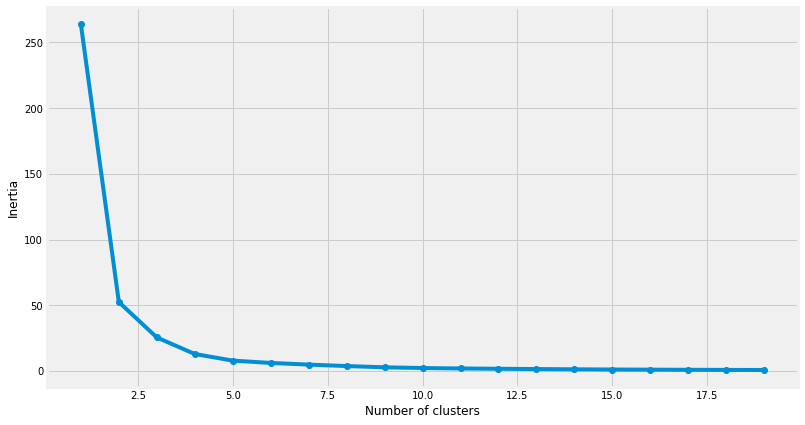

In [130]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,7))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [131]:
model = KMeans(n_clusters=5)

# Note I'm scaling the data to normalize it! Important for good results.

model = model.fit(scale(data))

# print(scale(data))
# print(data)

# We can look at the clusters each data point was assigned to
print(model.labels_)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


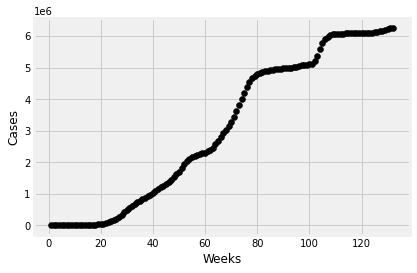

In [132]:
X = dropdata[["Weeks","Colombia"]]
#Visualise data points
plt.scatter(X["Weeks"],X["Colombia"],c = 'black')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

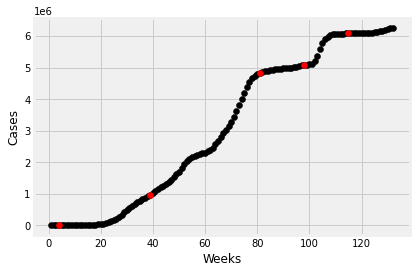

In [133]:
K=5

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Weeks"],X["Colombia"],c= 'black')
plt.scatter(Centroids["Weeks"],Centroids["Colombia"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

In [134]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Weeks"]-row_d["Weeks"])**2
            d2=(row_c["Colombia"]-row_d["Colombia"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Colombia","Weeks"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Colombia'] - Centroids['Colombia']).sum() + (Centroids_new['Weeks'] - Centroids['Weeks']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Colombia","Weeks"]]

-183715.4572394768
-156506.87067014142
-161374.73351851912
-210828.83298850572
0.0


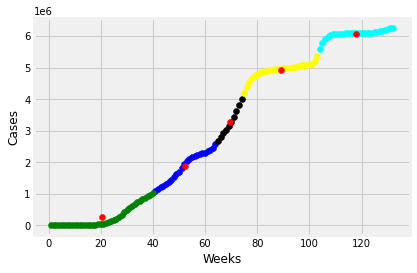

In [135]:
color=['blue','green','cyan','black','yellow']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Weeks"],data["Colombia"],c=color[k])
plt.scatter(Centroids["Weeks"],Centroids["Colombia"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

# Venezuela

In [136]:
data = pd.read_csv('Neighbouring.csv')
data.head()

Weeks  Uruguay  Argentina  Paraguay  Bolivia  Peru  Colombia  Venezuela  \
0      1        0          0         0        0     0         0          0   
1      2        0          0         0        0     0         0          0   
2      3        0          0         0        0     0         0          0   
3      4        0          0         0        0     0         0          0   
4      5        0          0         0        0     0         0          0   

   Guyana  Suriname  
0       0         0  
1       0         0  
2       0         0  
3       0         0  
4       0         0

In [137]:
dropdata = data

dropdata.drop('Uruguay',axis=1,inplace=True)
dropdata.drop('Argentina',axis=1,inplace=True)
dropdata.drop('Paraguay',axis=1,inplace=True)
dropdata.drop('Bolivia',axis=1,inplace=True)
dropdata.drop('Peru',axis=1,inplace=True)
dropdata.drop('Colombia',axis=1,inplace=True)
dropdata.drop('Guyana',axis=1,inplace=True)
dropdata.drop('Suriname',axis=1,inplace=True)

data.head()

Weeks  Venezuela
0      1          0
1      2          0
2      3          0
3      4          0
4      5          0

In [138]:
data.describe()

Weeks      Venezuela
count  132.000000     132.000000
mean    66.500000  241230.537879
std     38.249183  197400.467992
min      1.000000       0.000000
25%     33.750000   60882.000000
50%     66.500000  197764.000000
75%     99.250000  439801.000000
max    132.000000  534906.000000

In [139]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

0             1
count  1.320000e+02  1.320000e+02
mean   2.018587e-17 -1.009294e-17
std    1.003810e+00  1.003810e+00
min   -1.718979e+00 -1.226692e+00
25%   -8.594893e-01 -9.170980e-01
50%    0.000000e+00 -2.210335e-01
75%    8.594893e-01  1.009759e+00
max    1.718979e+00  1.493382e+00

In [140]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=4, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=4)

In [141]:
kmeans.inertia_

13.714854250375737

Text(0, 0.5, 'Inertia')

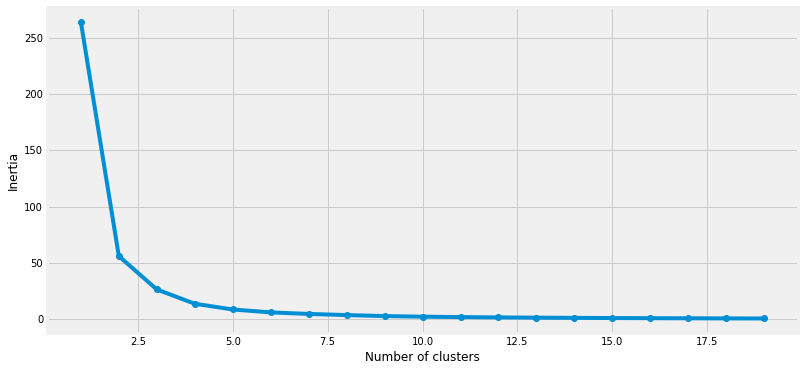

In [142]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [143]:
model = KMeans(n_clusters=4)

# Note I'm scaling the data to normalize it! Important for good results.

model = model.fit(scale(data))

# print(scale(data))
# print(data)

# We can look at the clusters each data point was assigned to
print(model.labels_)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


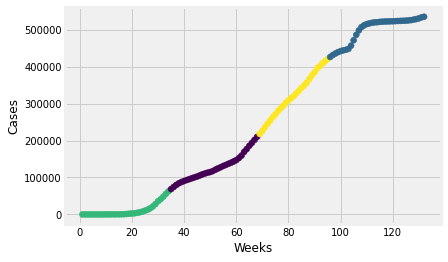

In [144]:
X = dropdata[["Weeks","Venezuela"]]
#Visualise data points
plt.scatter(X["Weeks"],X["Venezuela"],c = model.labels_.astype(np.int64))
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

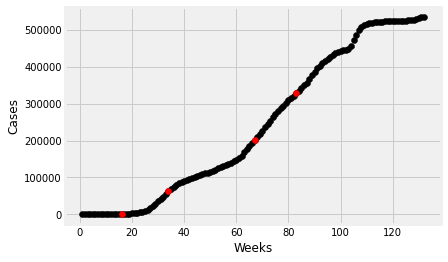

In [145]:
K=4

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Weeks"],X["Venezuela"],c= 'black')
plt.scatter(Centroids["Weeks"],Centroids["Venezuela"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

In [146]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Weeks"]-row_d["Weeks"])**2
            d2=(row_c["Venezuela"]-row_d["Venezuela"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Venezuela","Weeks"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Venezuela'] - Centroids['Venezuela']).sum() + (Centroids_new['Weeks'] - Centroids['Weeks']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Venezuela","Weeks"]]

73786.65607472592
49084.03408469062
34815.736573489405
18995.841954189164
16168.063105801168
6552.245291792642
9725.751661215862
0.0


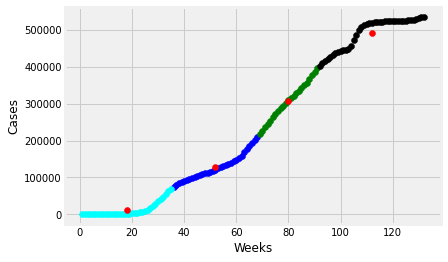

In [147]:
color=['blue','green','cyan','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Weeks"],data["Venezuela"],c=color[k])
plt.scatter(Centroids["Weeks"],Centroids["Venezuela"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

# Guyana

In [148]:
data = pd.read_csv('Neighbouring.csv')
data.head()

Weeks  Uruguay  Argentina  Paraguay  Bolivia  Peru  Colombia  Venezuela  \
0      1        0          0         0        0     0         0          0   
1      2        0          0         0        0     0         0          0   
2      3        0          0         0        0     0         0          0   
3      4        0          0         0        0     0         0          0   
4      5        0          0         0        0     0         0          0   

   Guyana  Suriname  
0       0         0  
1       0         0  
2       0         0  
3       0         0  
4       0         0

In [149]:
dropdata = data

dropdata.drop('Uruguay',axis=1,inplace=True)
dropdata.drop('Argentina',axis=1,inplace=True)
dropdata.drop('Paraguay',axis=1,inplace=True)
dropdata.drop('Bolivia',axis=1,inplace=True)
dropdata.drop('Peru',axis=1,inplace=True)
dropdata.drop('Colombia',axis=1,inplace=True)
dropdata.drop('Venezuela',axis=1,inplace=True)
dropdata.drop('Suriname',axis=1,inplace=True)

data.head()

Weeks  Guyana
0      1       0
1      2       0
2      3       0
3      4       0
4      5       0

In [150]:
data.describe()

Weeks        Guyana
count  132.000000    132.000000
mean    66.500000  23672.462121
std     38.249183  24545.388288
min      1.000000      0.000000
25%     33.750000   1871.750000
50%     66.500000  13241.000000
75%     99.250000  38695.000000
max    132.000000  69745.000000

In [151]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

0             1
count  1.320000e+02  1.320000e+02
mean   2.018587e-17  1.530762e-16
std    1.003810e+00  1.003810e+00
min   -1.718979e+00 -9.681103e-01
25%   -8.594893e-01 -8.915631e-01
50%    0.000000e+00 -4.266056e-01
75%    8.594893e-01  6.143625e-01
max    1.718979e+00  1.884185e+00

In [152]:
kmeans = KMeans(n_clusters=4, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=4)

In [153]:
kmeans.inertia_

13.02138037760104

Text(0, 0.5, 'Inertia')

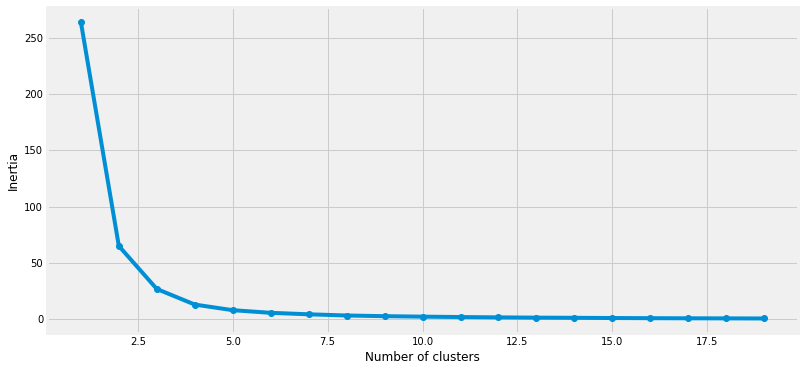

In [154]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [155]:
model = KMeans(n_clusters=4)

# Note I'm scaling the data to normalize it! Important for good results.

model = model.fit(scale(data))

# print(scale(data))
# print(data)

# We can look at the clusters each data point was assigned to
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


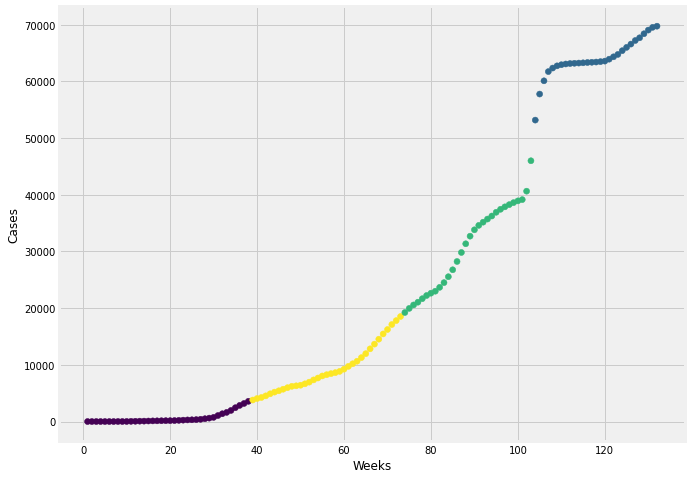

In [156]:
X = dropdata[["Weeks","Guyana"]]
#Visualise data points
plt.figure(figsize=(10, 8))
plt.scatter(X["Weeks"],X["Guyana"],c = model.labels_.astype(np.int64))
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

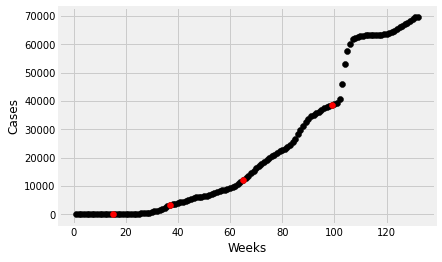

In [157]:
K=4

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Weeks"],X["Guyana"],c= 'black')
plt.scatter(Centroids["Weeks"],Centroids["Guyana"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

In [158]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Weeks"]-row_d["Weeks"])**2
            d2=(row_c["Guyana"]-row_d["Guyana"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Guyana","Weeks"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Guyana'] - Centroids['Guyana']).sum() + (Centroids_new['Weeks'] - Centroids['Weeks']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Guyana","Weeks"]]

9573.949673748184
10206.497072467037
9329.02578812448
3863.618723795672
1925.9045803658692
2006.168257408791
1974.2563173712676
2217.3468991877667
2328.653788642921
2411.9370461594613
1732.4601482153626
934.8709921798659
1352.7405917040865
0.0


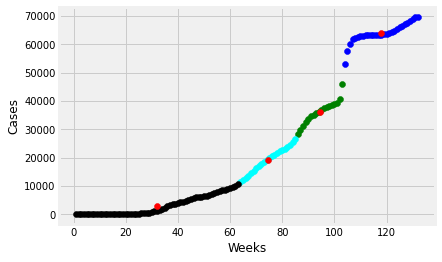

In [159]:
color=['blue','green','cyan','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Weeks"],data["Guyana"],c=color[k])
plt.scatter(Centroids["Weeks"],Centroids["Guyana"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

# Suriname

In [160]:
data = pd.read_csv('Neighbouring.csv')
data.head()

Weeks  Uruguay  Argentina  Paraguay  Bolivia  Peru  Colombia  Venezuela  \
0      1        0          0         0        0     0         0          0   
1      2        0          0         0        0     0         0          0   
2      3        0          0         0        0     0         0          0   
3      4        0          0         0        0     0         0          0   
4      5        0          0         0        0     0         0          0   

   Guyana  Suriname  
0       0         0  
1       0         0  
2       0         0  
3       0         0  
4       0         0

In [161]:
dropdata = data

dropdata.drop('Uruguay',axis=1,inplace=True)
dropdata.drop('Argentina',axis=1,inplace=True)
dropdata.drop('Paraguay',axis=1,inplace=True)
dropdata.drop('Bolivia',axis=1,inplace=True)
dropdata.drop('Peru',axis=1,inplace=True)
dropdata.drop('Colombia',axis=1,inplace=True)
dropdata.drop('Venezuela',axis=1,inplace=True)
dropdata.drop('Guyana',axis=1,inplace=True)

data.head()

Weeks  Suriname
0      1         0
1      2         0
2      3         0
3      4         0
4      5         0

In [162]:
data.describe()

Weeks      Suriname
count  132.000000    132.000000
mean    66.500000  28869.166667
std     38.249183  30710.682881
min      1.000000      0.000000
25%     33.750000   4573.500000
50%     66.500000  10390.000000
75%     99.250000  51341.250000
max    132.000000  80966.000000

In [163]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

0             1
count  1.320000e+02  1.320000e+02
mean   2.018587e-17 -1.783085e-16
std    1.003810e+00  1.003810e+00
min   -1.718979e+00 -9.436177e-01
25%   -8.594893e-01 -7.941283e-01
50%    0.000000e+00 -6.040101e-01
75%    8.594893e-01  7.345226e-01
max    1.718979e+00  1.702837e+00

In [164]:
kmeans = KMeans(n_clusters=4, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=4)

In [165]:
kmeans.inertia_

13.838864092016419

Text(0, 0.5, 'Inertia')

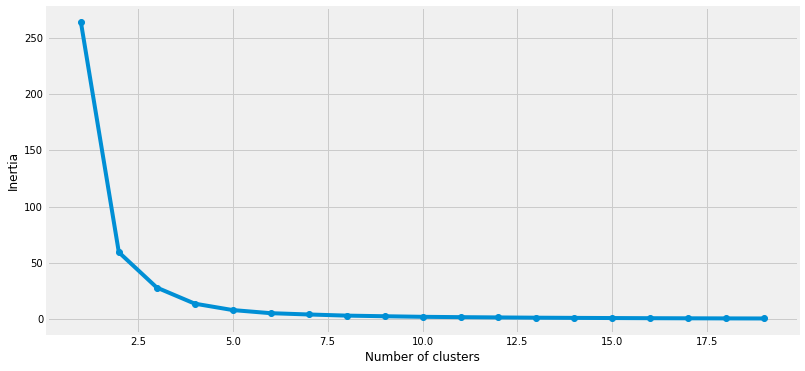

In [166]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [167]:
model = KMeans(n_clusters=4)

# Note I'm scaling the data to normalize it! Important for good results.

model = model.fit(scale(data))

# print(scale(data))
# print(data)

# We can look at the clusters each data point was assigned to
print(model.labels_)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


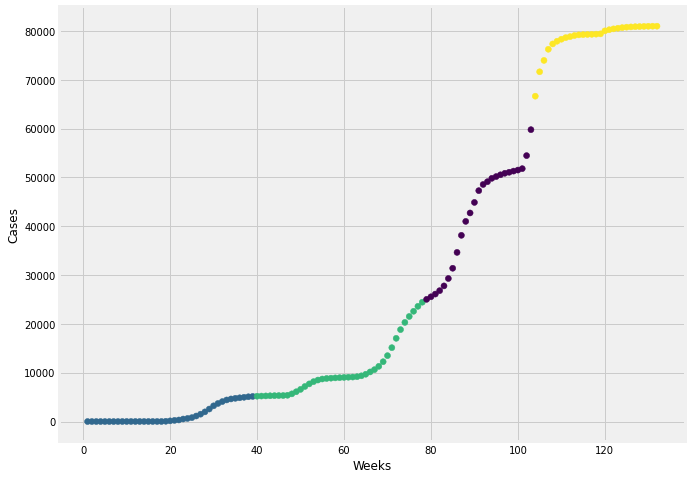

In [168]:
X = dropdata[["Weeks","Suriname"]]
#Visualise data points
plt.figure(figsize=(10, 8))
plt.scatter(X["Weeks"],X["Suriname"],c = model.labels_.astype(np.int64))
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

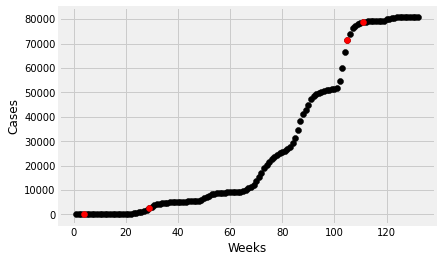

In [169]:
K=4

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Weeks"],X["Suriname"],c= 'black')
plt.scatter(Centroids["Weeks"],Centroids["Suriname"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()

In [170]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Weeks"]-row_d["Weeks"])**2
            d2=(row_c["Suriname"]-row_d["Suriname"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Suriname","Weeks"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Suriname'] - Centroids['Suriname']).sum() + (Centroids_new['Weeks'] - Centroids['Weeks']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Suriname","Weeks"]]

574.6322562947557
2075.144501356194
4581.971590181772
2681.345719537815
2234.5355214549645
773.5175481061988
0.0


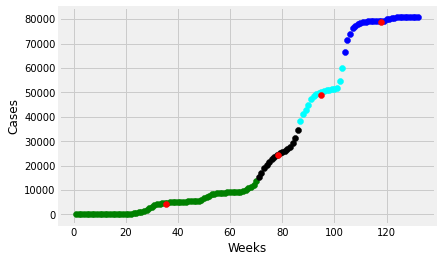

In [171]:
color=['blue','green','cyan','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Weeks"],data["Suriname"],c=color[k])
plt.scatter(Centroids["Weeks"],Centroids["Suriname"],c='red')
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.show()